# The following steps I followed :                         
1.I have imported the Libraries
2. Then import the Dataset
3. Perform the DATA ANALYSIS (DM, DE, DC, DV, EDA )
4. Feature Scaling
5. Encoding
6. Feature Selection
7. Choosing the model - Logistic Regression
8. Split the Data - The method I used here is CV means  
   " Cross Validation ".
9. Training the Model
10. Test the Model
11. Performance - Confusion Metric


# Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix

# Import the Dataset

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Data Analysis : Trying to find the target feature

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
# To find the NULL Values of a features

df.isnull().sum()

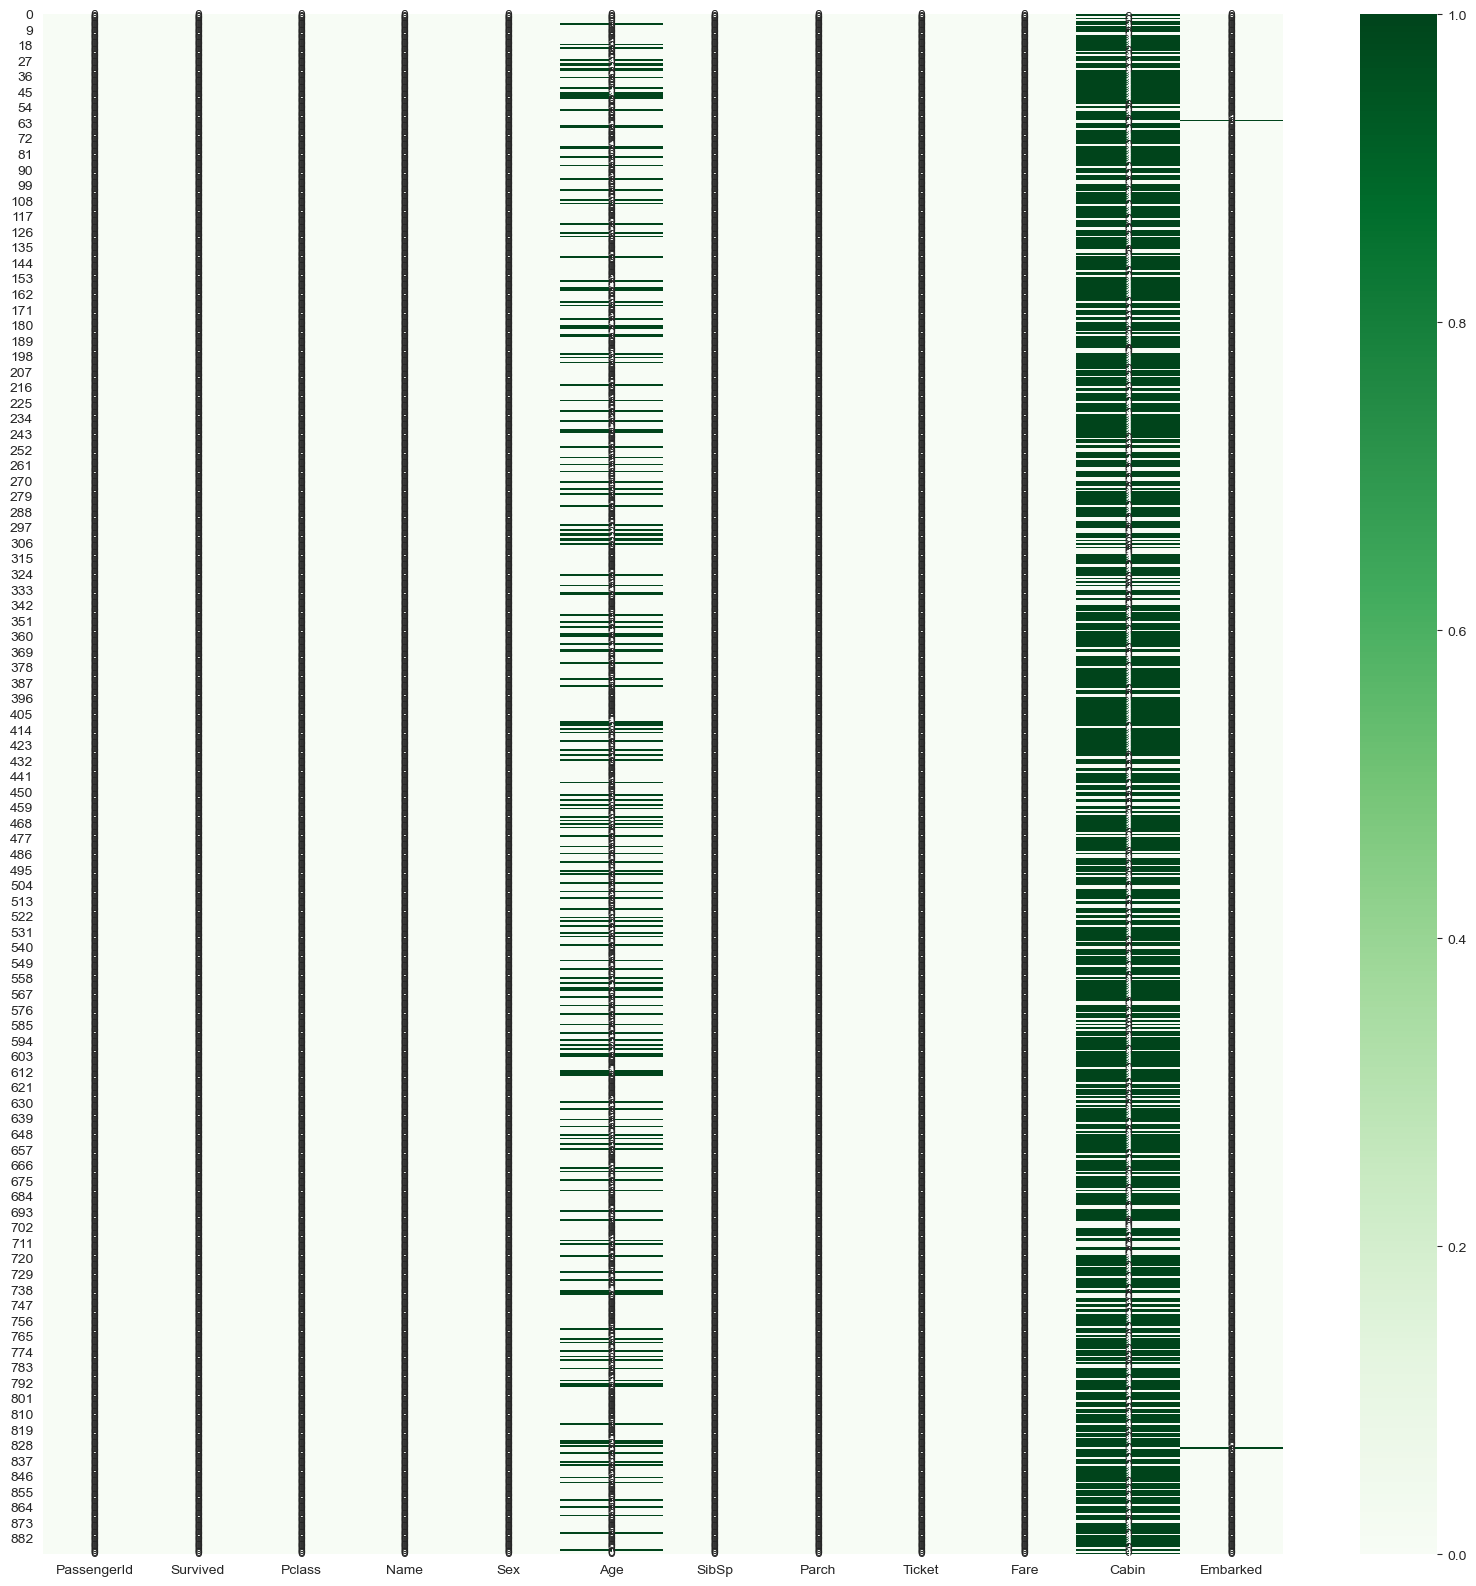

In [ ]:
# Using Heatmap to visualize the Null Values

plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(),annot=True,cmap='Greens')

In [ ]:
# As we could see the feature Age and Cabin has Null values.
# We Calculate the percentage of Null Values missing in Age

(df.Age.isnull().sum()/len(df.Age))*100

19.865319865319865

In [ ]:
# We Calculate the percentage of Null Values missing in Cabin

(df.Cabin.isnull().sum()/len(df.Cabin))*100

77.10437710437711

In [ ]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# I had Dropped  The cabin Feature
df.drop('Cabin',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [ ]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
# Show the Datapoint where the Embarked is NUll

df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [ ]:
# Show all the Embarked value where the Pclass = 1

df.loc[df.Pclass==1,"Embarked"].value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [ ]:
# Show all the Embarked value where the Pclass = 2

df.loc[df.Pclass==2,"Embarked"].value_counts()

S    164
C     17
Q      3
Name: Embarked, dtype: int64

In [ ]:
# Show all the Embarked value where the Pclass = 3

df.loc[df.Pclass==3,"Embarked"].value_counts()

S    353
Q     72
C     66
Name: Embarked, dtype: int64

In [ ]:
# Show all the Embarked value where he Fare = 80.0

df.loc[df.Fare==80.0,"Embarked"].value_counts()

Series([], Name: Embarked, dtype: int64)

In [ ]:
# Show all the Embarked value where the Ticket = 113572

df.loc[df.Ticket==113572,"Embarked"].value_counts()

Series([], Name: Embarked, dtype: int64)

In [ ]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
# Mean of Age Column
df.Age.mean()

29.69911764705882

In [ ]:
# Median of Age Column
df.Age.median()

28.0

In [ ]:
# Mode of Age Column
df.Age.mode()

0    24.0
Name: Age, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


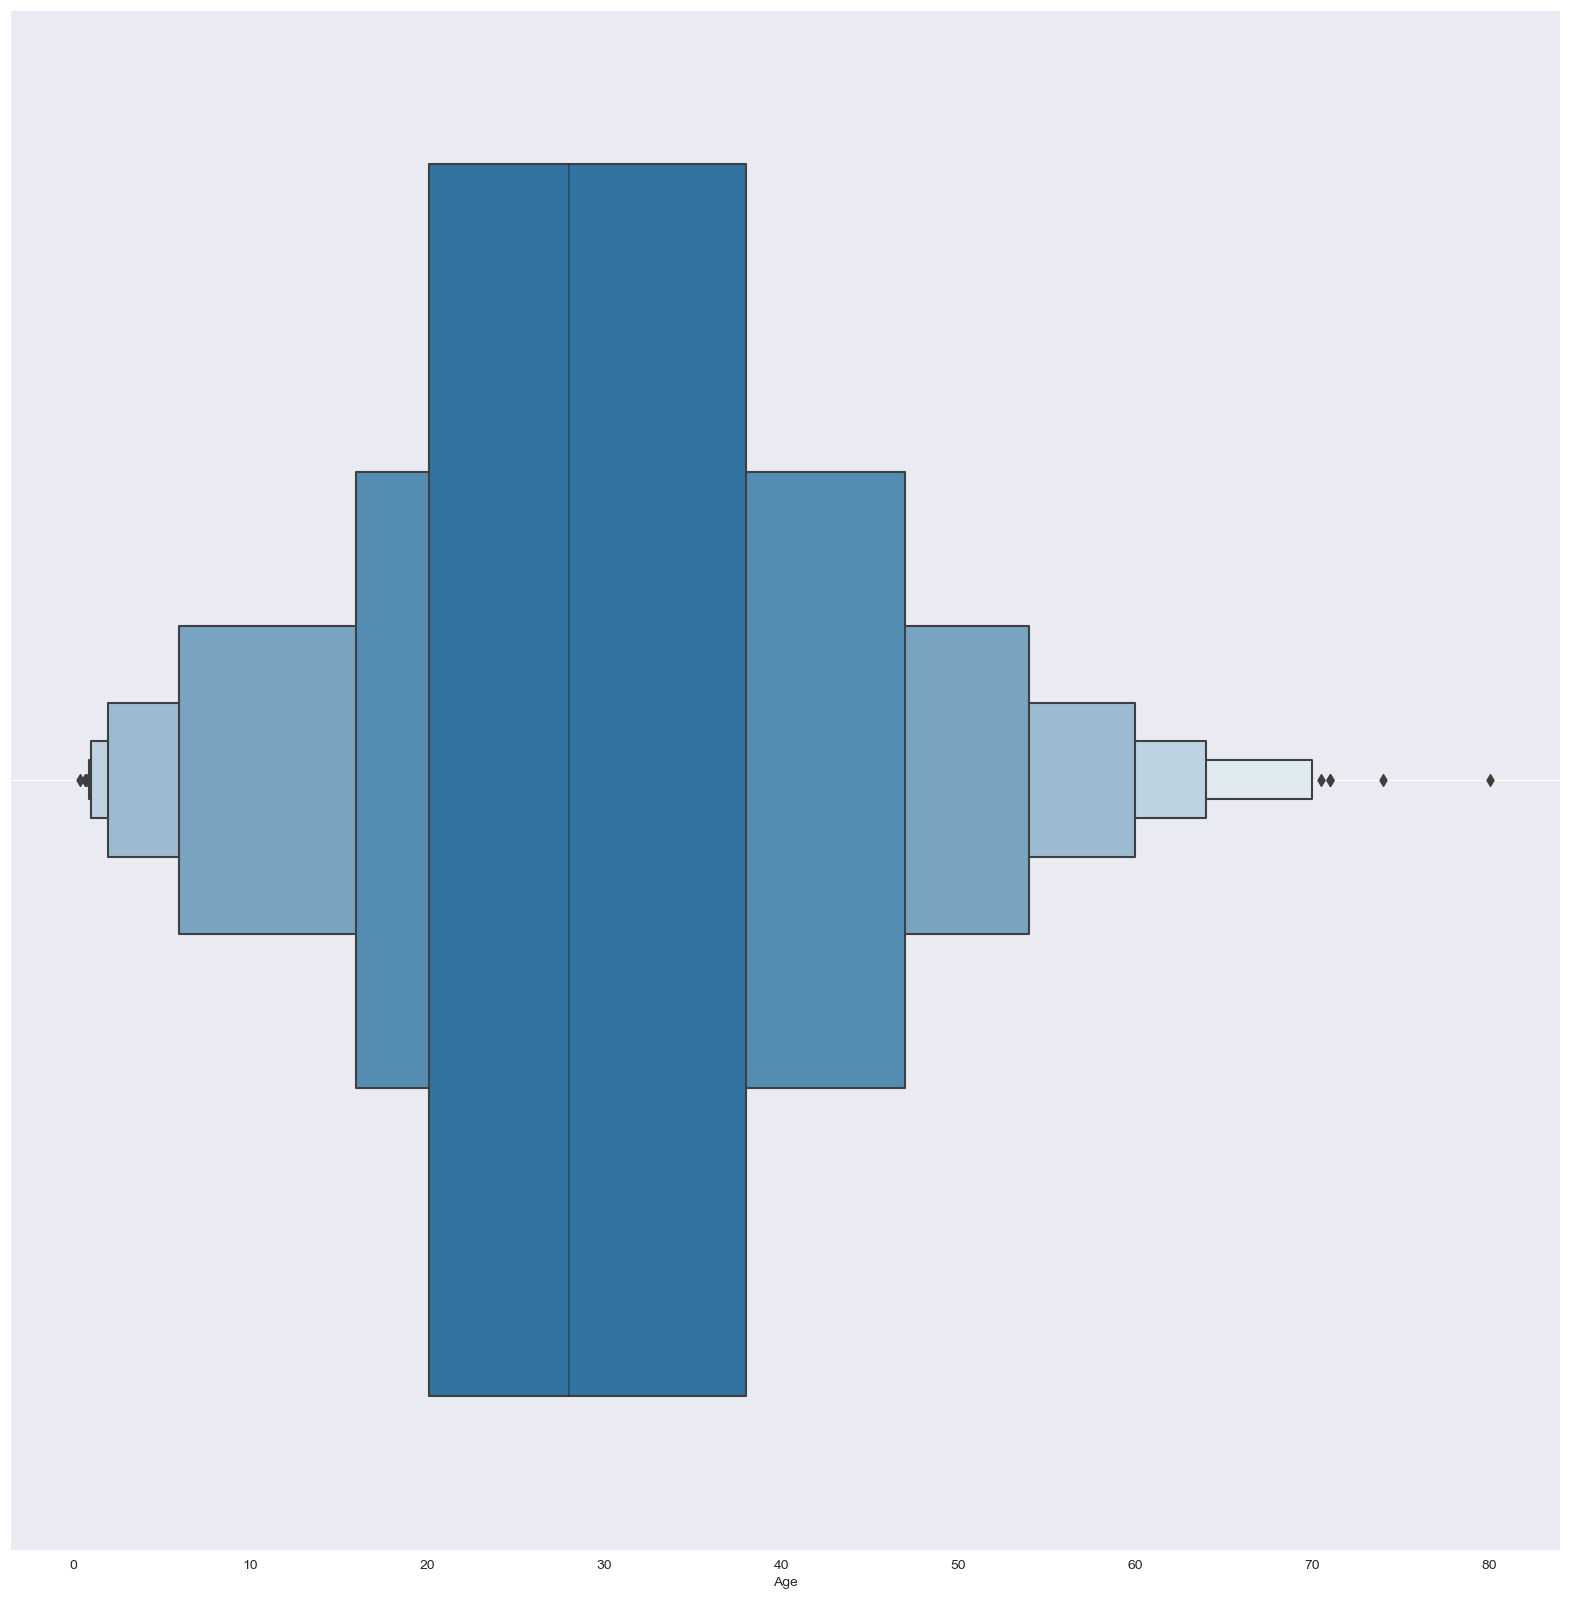

In [ ]:
# Plot a boxplot to find out the outliners in the Age columns
#df.boxplot()
plt.figure(figsize=(20,20))
sns.boxenplot(df.Age)
plt.grid()

In [ ]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [ ]:
df.shape

(891, 11)

In [ ]:
# I fill all the NULL values in the Age Column with its median Value
df.Age.fillna(value=df.Age.median(),inplace=True)

In [ ]:
# Checking whether Age has Null Values or not
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
# Drop the rows where Embarked is null
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df.shape

(889, 11)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
# I have Dropped off the columns - PassengerID, Names, Ticket
df.drop(['PassengerId','Name','Ticket'],inplace=True,axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


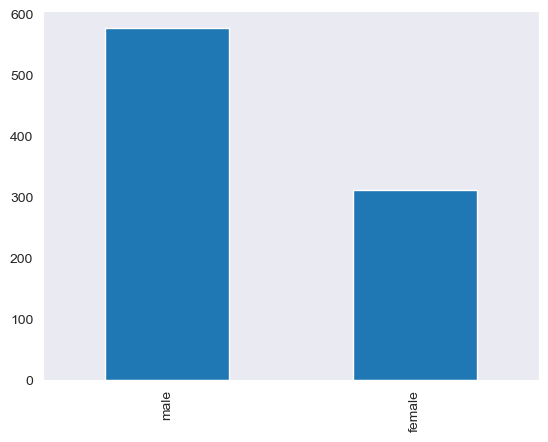

In [ ]:
# I Want to check the strength of Male and Female using Graph
df.Sex.value_counts().plot.bar(df.Sex)
plt.grid()

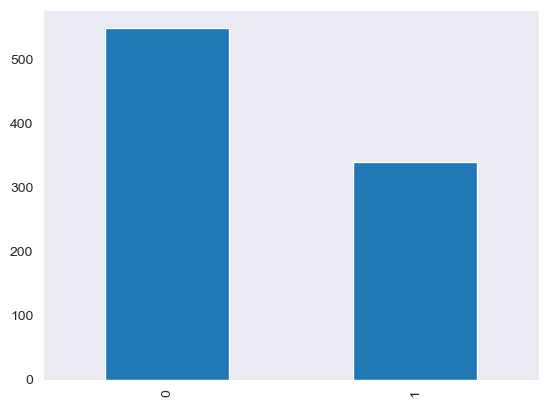

In [ ]:
# I have found out the Strength of Survival V/s Strength of Non Survival
df.Survived.value_counts().plot.bar(df.Survived)
plt.grid()

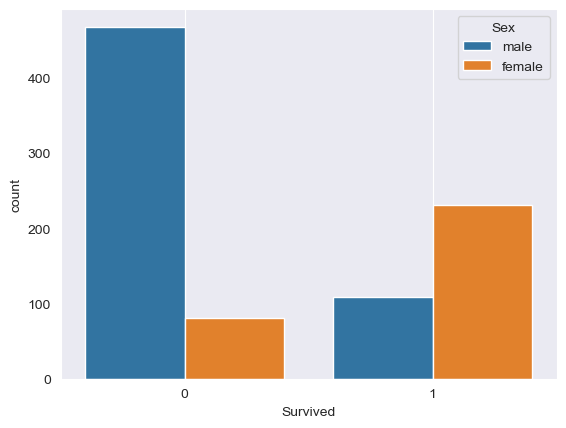

In [ ]:
# I have plotted a graph which depicts how many people survived and non survived rate in context to Sex
sns.countplot(x='Survived',data=df,hue='Sex')
plt.grid()

<AxesSubplot:>

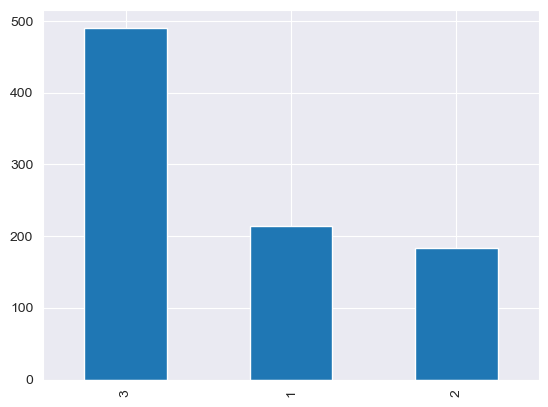

In [ ]:
# I have plot a graph to find out the strength of the Pclass
df.Pclass.value_counts().plot.bar(df.Pclass)

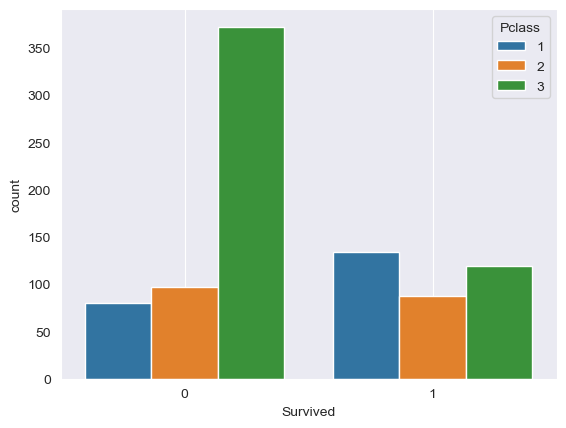

In [ ]:
# I have plotted a graph which depicts how many people survived and non survived rate in context to Pclass
sns.countplot(x='Survived',data=df,hue='Pclass')
plt.grid()

# We could do more EDA - Using more plots, more graphs, more charts

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Encoders -  Used to change the data from Numerical form to Categorical form without meaning change

In [ ]:
# Label Encoding for the column Sex
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc=LabelEncoder()

In [ ]:
df.Sex=enc.fit_transform(df.Sex)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [ ]:
# The Age datatype is "Float" so I converted to "Integer"
df.Age=df.Age.astype(int)

In [ ]:
df.Fare=round(df.Fare,2)

In [ ]:
# One Hot Encoding for the column Embarked
from sklearn.preprocessing import LabelEncoder

In [ ]:
newdf =df.copy()

In [ ]:
#newdf=pd.get_dummies(newdf['Embarked'])
#newdf.head()

In [ ]:
df=pd.concat([newdf],axis=1,)

In [ ]:
newdf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.25,S
1,1,1,0,38,1,0,71.28,C
2,1,3,0,26,0,0,7.92,S
3,1,1,0,35,1,0,53.10,S
4,0,3,1,35,0,0,8.05,S


In [ ]:
pd.get_dummies(newdf['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [ ]:
df=pd.concat([df,pd.get_dummies(df['Embarked'])],axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,1,22,1,0,7.25,S,0,0,1
1,1,1,0,38,1,0,71.28,C,1,0,0
2,1,3,0,26,0,0,7.92,S,0,0,1
3,1,1,0,35,1,0,53.10,S,0,0,1
4,0,3,1,35,0,0,8.05,S,0,0,1


In [ ]:
df.drop(['Embarked','C'],axis=1,inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22,1,0,7.25,0,1
1,1,1,0,38,1,0,71.28,0,0
2,1,3,0,26,0,0,7.92,0,1
3,1,1,0,35,1,0,53.10,0,1
4,0,3,1,35,0,0,8.05,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int32  
 3   Age       889 non-null    int32  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
dtypes: float64(1), int32(2), int64(4), uint8(2)
memory usage: 50.4 KB


<AxesSubplot:>

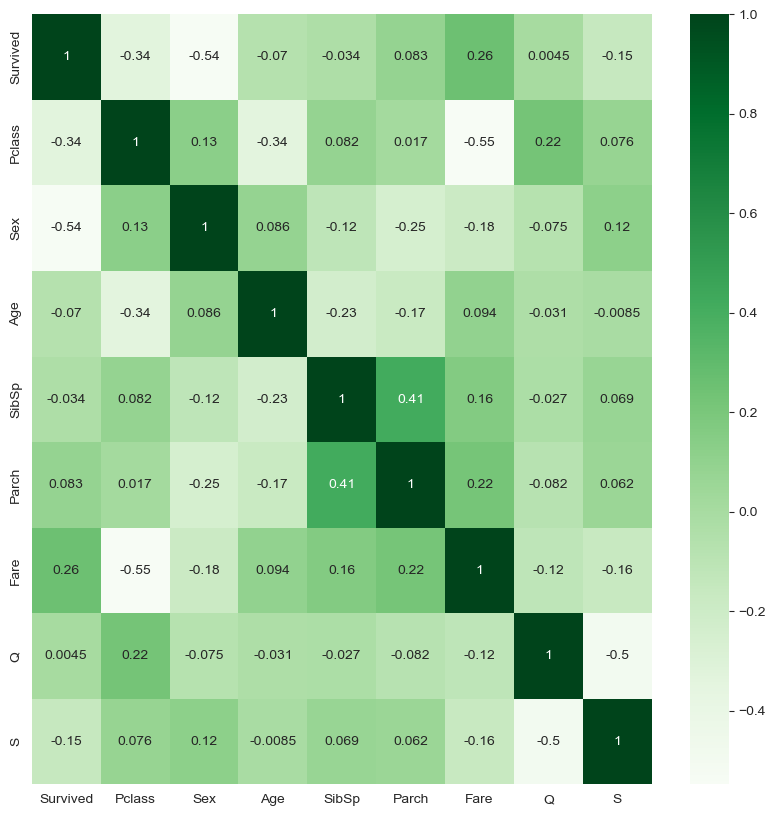

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

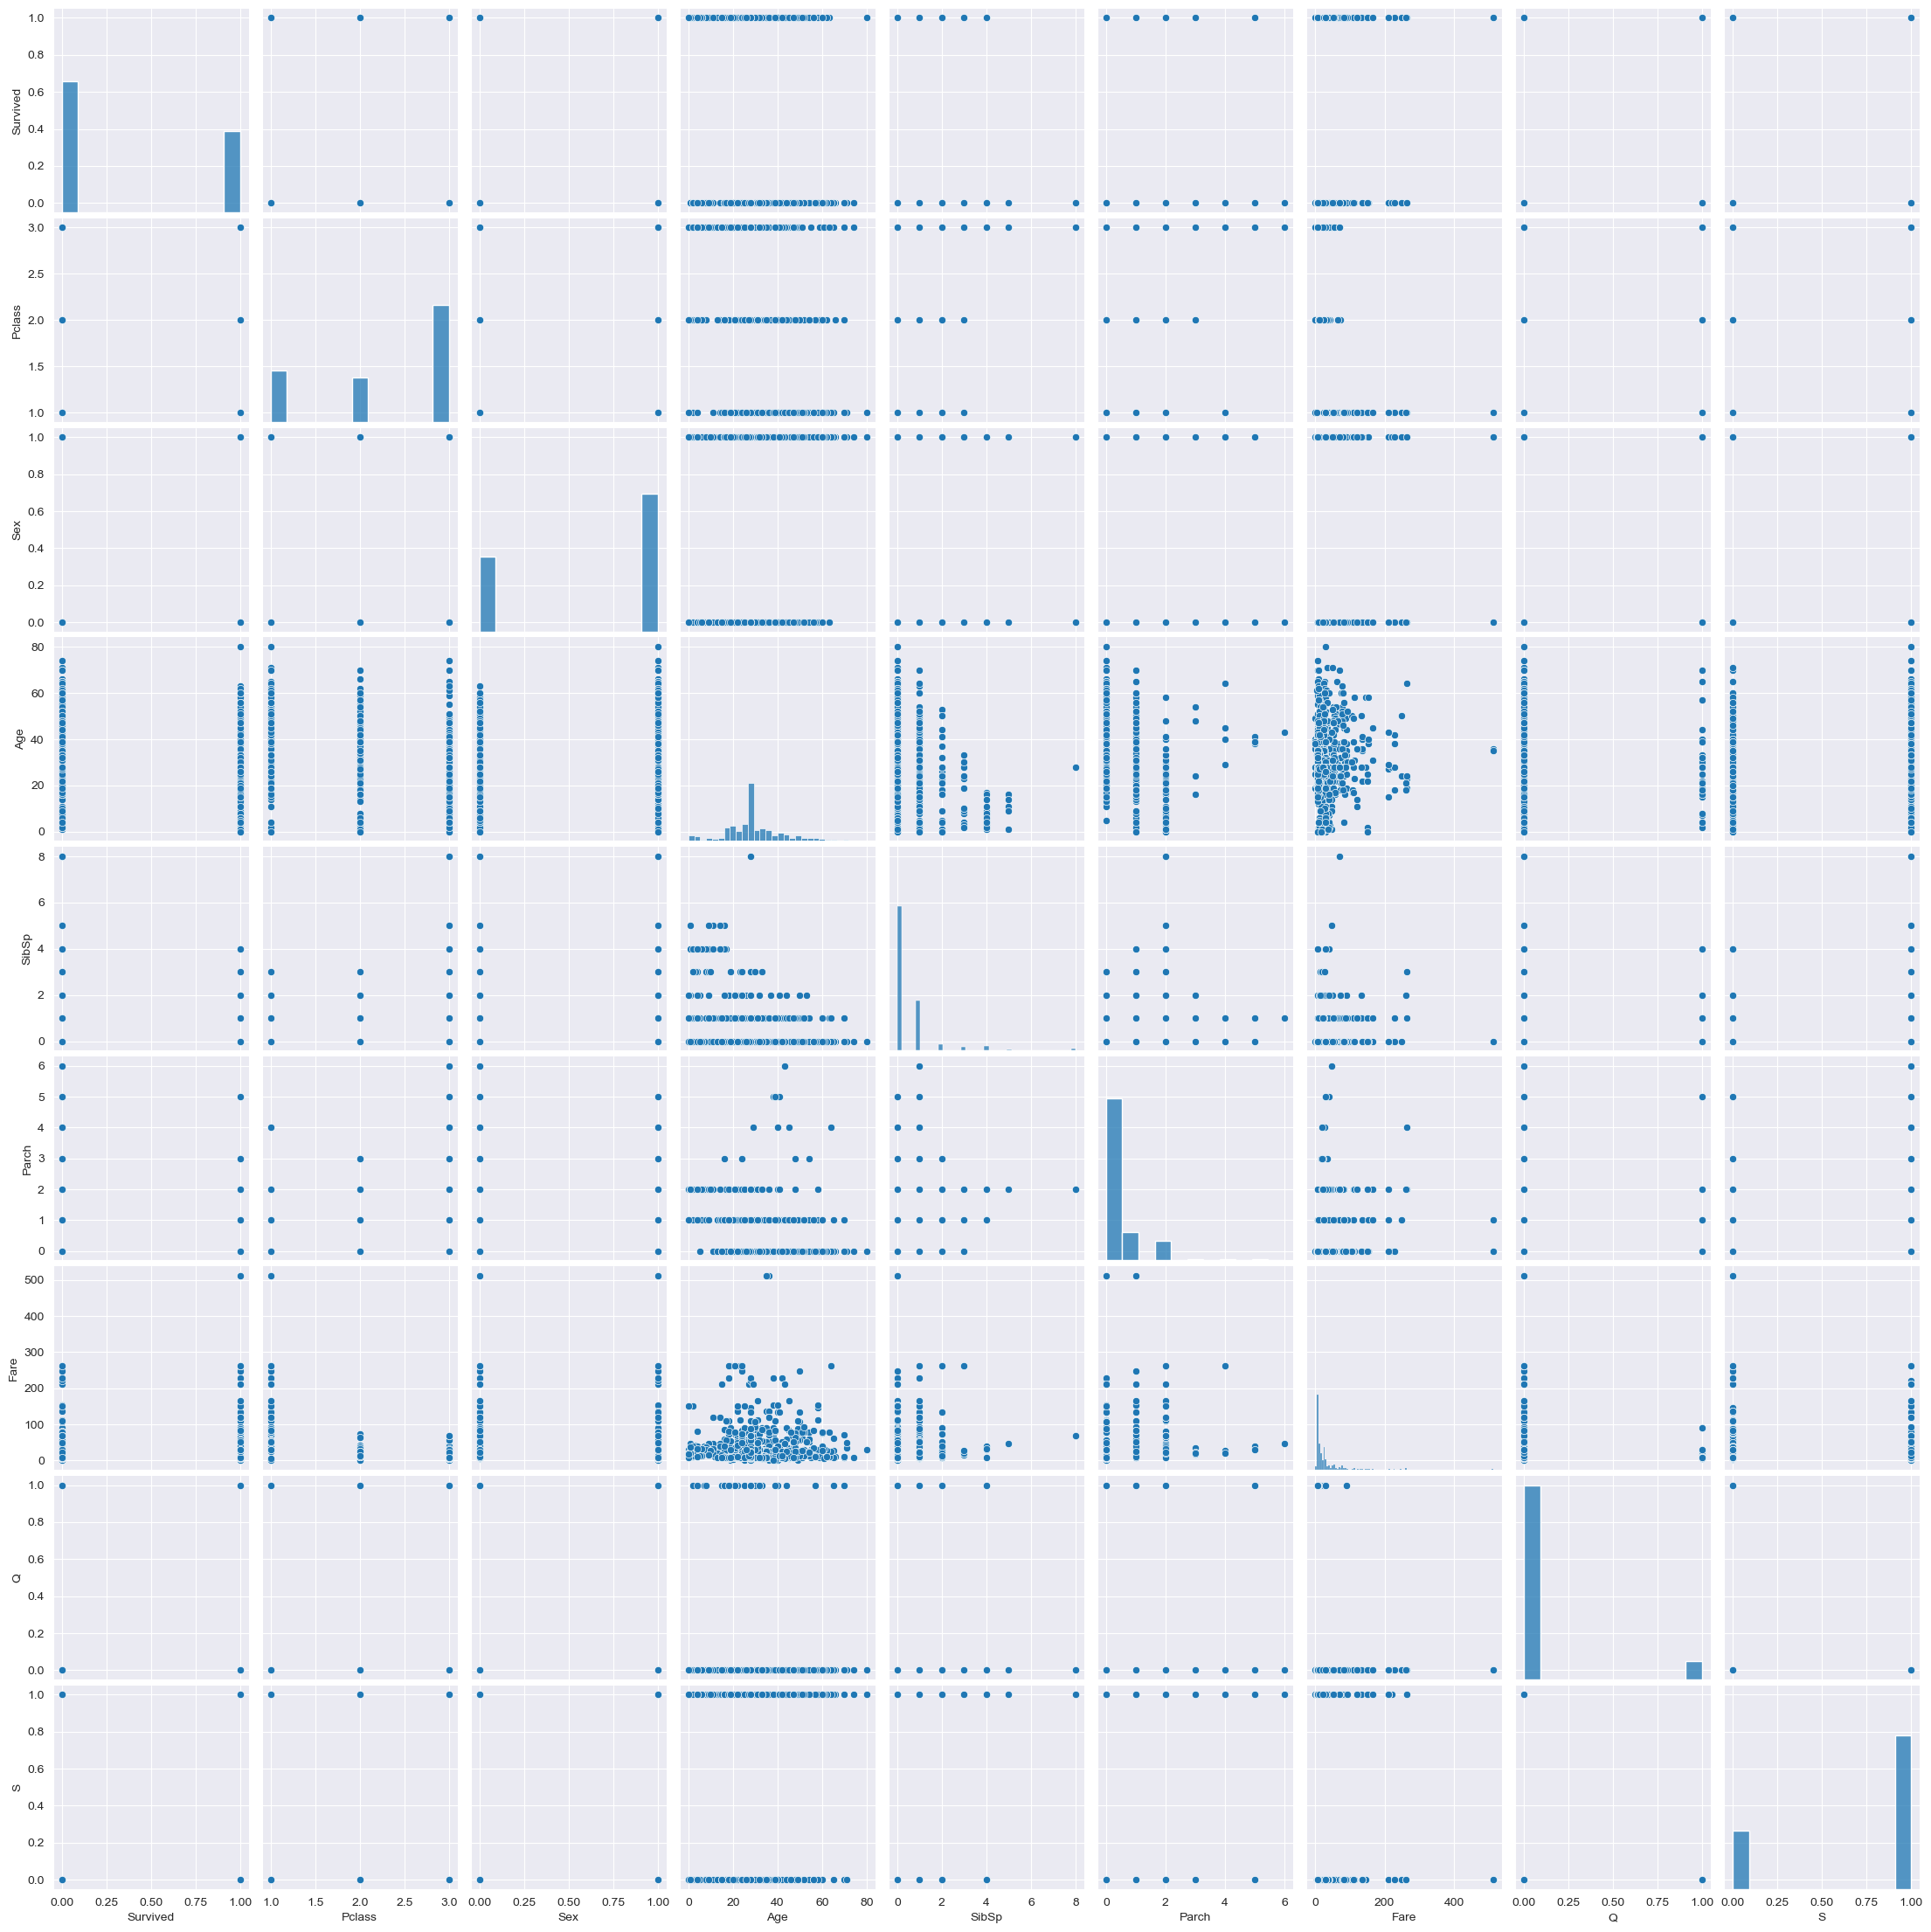

In [ ]:
sns.pairplot(df)

# I need to choose the Feature which has greater impact

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22,1,0,7.25,0,1
1,1,1,0,38,1,0,71.28,0,0
2,1,3,0,26,0,0,7.92,0,1
3,1,1,0,35,1,0,53.10,0,1
4,0,3,1,35,0,0,8.05,0,1


In [ ]:
X=df.iloc[:,1:]
y=df.iloc[:0]

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,22,1,0,7.25,0,1
1,1,0,38,1,0,71.28,0,0
2,3,0,26,0,0,7.92,0,1
3,1,0,35,1,0,53.10,0,1
4,3,1,35,0,0,8.05,0,1
...,...,...,...,...,...,...,...,...
886,2,1,27,0,0,13.00,0,1
887,1,0,19,0,0,30.00,0,1
888,3,0,28,1,2,23.45,0,1
889,1,1,26,0,0,30.00,0,0


In [ ]:
y

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
feat=ExtraTreesClassifier()

In [ ]:
#feat.fit(X,y)

# Now I have Splitted the Data using CV - Cross Validation Technique



In [ ]:
skf=StratifiedKFold(n_splits=5)

In [ ]:
for train_index, test_index in skf.split(X,y) :
  X_train,X_test=X.iloc[train_index],X.iloc[test_index]
  y_train,y_test=y.iloc[train_index],y.iloc[test_index]

ValueError: Found array with 0 sample(s) (shape=(0, 9)) while a minimum of 1 is required.

In [ ]:
X_train

In [ ]:
y_train

# Model Selection

In [ ]:
classifier = LogisticRegression()

# Now I Train the Model

In [ ]:
classifier.fit(X_train,y_Train)

# Time to Test The Model

In [ ]:
y_pred = classifier.predict(X_test)

# EDA

In [ ]:
final=pd.Dataframe({"Actual":y_test,"Predicted Value":y_pred})

In [ ]:
final.head()

In [ ]:
sns.heatmap(final.corr(),annot=True,cmap='Greens')

# Lets calculate Performance Metric using Confusion Metric

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
#accuracy =

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report(y_test,y_pred)